In [4]:
!pip install -q transformers

In [5]:
!pip install -q youtube_transcript_api

In [6]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [7]:
youtube_video = "https://www.youtube.com/watch?v=eIho2S0ZahI"

In [8]:
video_id = youtube_video.split("=")[1]

In [9]:
video_id

'eIho2S0ZahI'

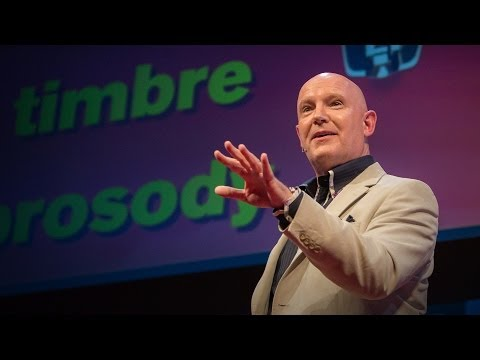

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [11]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [12]:
transcript[0:5]

[{'text': 'The human voice:', 'start': 13.96, 'duration': 2.086},
 {'text': "It's the instrument we all play.",
  'start': 16.07,
  'duration': 1.564},
 {'text': "It's the most powerful sound\nin the world, probably.",
  'start': 18.61,
  'duration': 2.459},
 {'text': 'It\'s the only one that can start a war\nor say "I love you."',
  'start': 21.093,
  'duration': 2.823},
 {'text': 'And yet many people have the experience',
  'start': 23.94,
  'duration': 1.858}]

In [13]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9108


In [14]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [15]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 The human voice: It's the instrument we all play. It's the most powerful sound
in the world, probably. It's the only one that can start a war
or say "I love you." And yet many people have the experience that when they speak, people
don't listen to them. And why is that? How can we speak powerfully
to make change in the world? What I'd like to suggest, there are a number of habits
that we need to move away from. I've assembled for your pleasure here
seven deadly sins of speaking. I'm not pretending
this is an exhaustive list, but these seven, I think, are pretty large
habits that we can all fall into. First, gossip. Speaking ill of somebody
who's not present. Not a nice habit,
and we know perfectly well the person gossiping, five minutes later,
will be gossiping about us. Second, judging. We know people who are like this
in conversation, and it's very hard to listen to somebody if you know that you're being judged
and found wanting at the same time. Third, negativity. You c

Your max_length is set to 142, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Summarized text
 We speak not very well to people who simply aren't listening in an environment that's all about noise and bad acoustics . The pros call this the siren. It starts with "we" and goes to "aw," the "aw" is low. Give yourselves a round of applause. Next time you speak, do those in advance. (Applause)
input text 
l, and one where understanding
would be the norm, and that is an idea worth spreading. Thank you. (Applause)
Summarized text
 l, and one where understanding would be the norm, and that is an idea worth spreading . Thank you. (Applause) Thank you for your support in the UK. l, one of the world's most successful democracies . (Apprause) thank you. l .


In [16]:
len(str(summarized_text))

2888

In [17]:
a = str(summarized_text)

In [18]:
a = a.replace('/', '')

In [19]:
print(a)

[' The human voice is the most powerful sound in the world, probably. It\'s the only one that can start a war or say "I love you" And yet many people have the experience that when they speak, people don\'t listen to them. What I\'d like to suggest, there are a number of habits we need to move away from .', " My mother, in the last years of her life, became very negative, and it's hard to listen to her . Complaining is viral misery. It's not spreading sunshine and lightness in the world. It demeans our language. Excuses are excuses. We've all met this guy.", ' The confusion of facts with opinions is difficult to listen to, says David Frum . He says there are four powerful cornerstones, foundations, that we can stand on if we want our speech to be powerful . Fortunately, these things spell a word: "hail," and it has a great definition as well .', " H is honesty, of course, being true in what you say, being straight and clear . The A is authenticity, authenticity, just being yourself . Th

In [ ]:
a = a.replace("]\", '')

In [20]:
a

'[\' The human voice is the most powerful sound in the world, probably. It\\\'s the only one that can start a war or say "I love you" And yet many people have the experience that when they speak, people don\\\'t listen to them. What I\\\'d like to suggest, there are a number of habits we need to move away from .\', " My mother, in the last years of her life, became very negative, and it\'s hard to listen to her . Complaining is viral misery. It\'s not spreading sunshine and lightness in the world. It demeans our language. Excuses are excuses. We\'ve all met this guy.", \' The confusion of facts with opinions is difficult to listen to, says David Frum . He says there are four powerful cornerstones, foundations, that we can stand on if we want our speech to be powerful . Fortunately, these things spell a word: "hail," and it has a great definition as well .\', " H is honesty, of course, being true in what you say, being straight and clear . The A is authenticity, authenticity, just being

In [21]:
# importing libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Input text - to summarize
text = a

# Tokenizing the text
stopWords = set(stopwords.words("english"))
words = word_tokenize(text)

# Creating a frequency table to keep the
# score of each word

freqTable = dict()
for word in words:
	word = word.lower()
	if word in stopWords:
		continue
	if word in freqTable:
		freqTable[word] += 1
	else:
		freqTable[word] = 1

# Creating a dictionary to keep the score
# of each sentence
sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
	for word, freq in freqTable.items():
		if word in sentence.lower():
			if sentence in sentenceValue:
				sentenceValue[sentence] += freq
			else:
				sentenceValue[sentence] = freq



sumValues = 0
for sentence in sentenceValue:
	sumValues += sentenceValue[sentence]

# Average value of a sentence from the original text

average = int(sumValues / len(sentenceValue))

# Storing sentences into our summary.
summary = ''
for sentence in sentences:
	if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
		summary += " " + sentence



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
print(summary)

 [' The human voice is the most powerful sound in the world, probably. It\'s the only one that can start a war or say "I love you" And yet many people have the experience that when they speak, people don\'t listen to them. What I\'d like to suggest, there are a number of habits we need to move away from . ', " My mother, in the last years of her life, became very negative, and it's hard to listen to her . ", ' The confusion of facts with opinions is difficult to listen to, says David Frum . He says there are four powerful cornerstones, foundations, that we can stand on if we want our speech to be powerful . Fortunately, these things spell a word: "hail," and it has a great definition as well . ', " H is honesty, of course, being true in what you say, being straight and clear . The I is integrity, being your word, and being somebody people can trust . I don't mean romantic love, but I do mean wishing people well . ", " We vote for politicians with lower voices, it's true, because we ass